In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#extractinf data
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [15]:
#droping irrelavant columns from the dataset
df = df.drop(columns=['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'])
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [16]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [18]:
#checking for the null values
df.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [24]:
# separating features and label data
x = df.drop(columns = 'Happiness Score')
y = df['Happiness Score']

In [28]:
x.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


<AxesSubplot:>

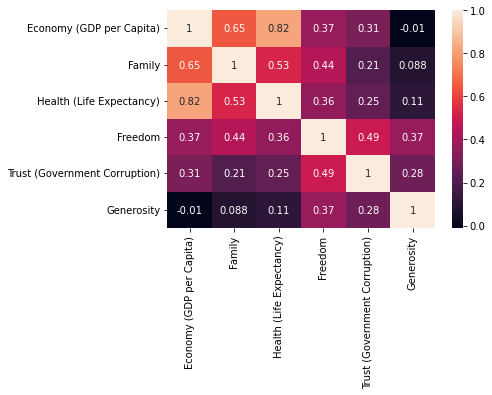

In [32]:
#checking for the multicolinearity
sns.heatmap(x.corr(),annot=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

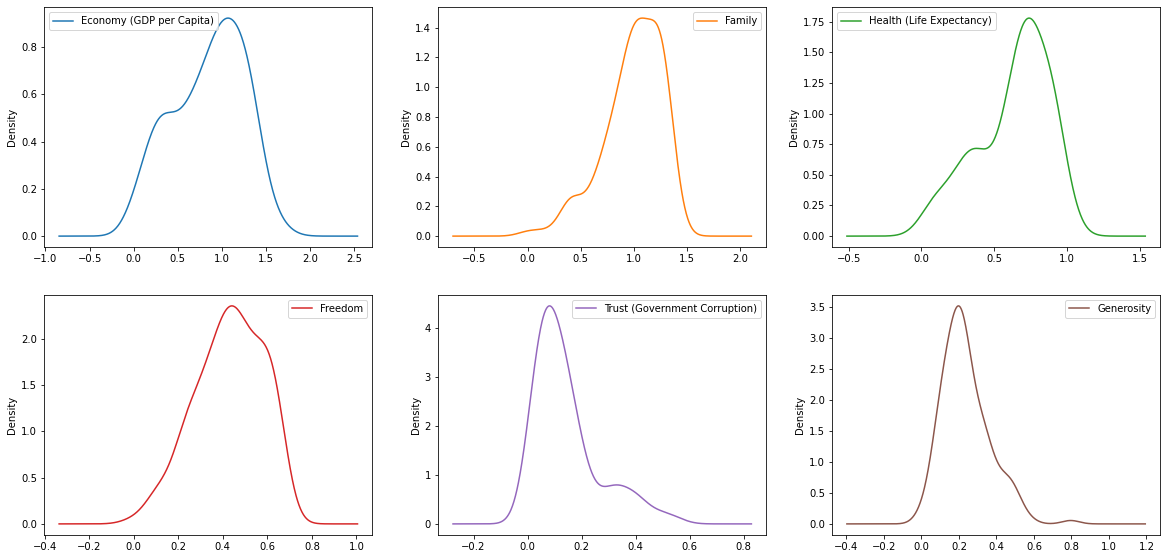

In [36]:
#checking for the distribution of feature data
x.plot(kind='density',subplots=True,sharex=False,layout=(3,3),figsize=(20,15))

In [86]:
from sklearn.preprocessing import power_transform
x_trans = power_transform(x)

In [87]:
x_trans = pd.DataFrame(x_trans,columns=[x.columns])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

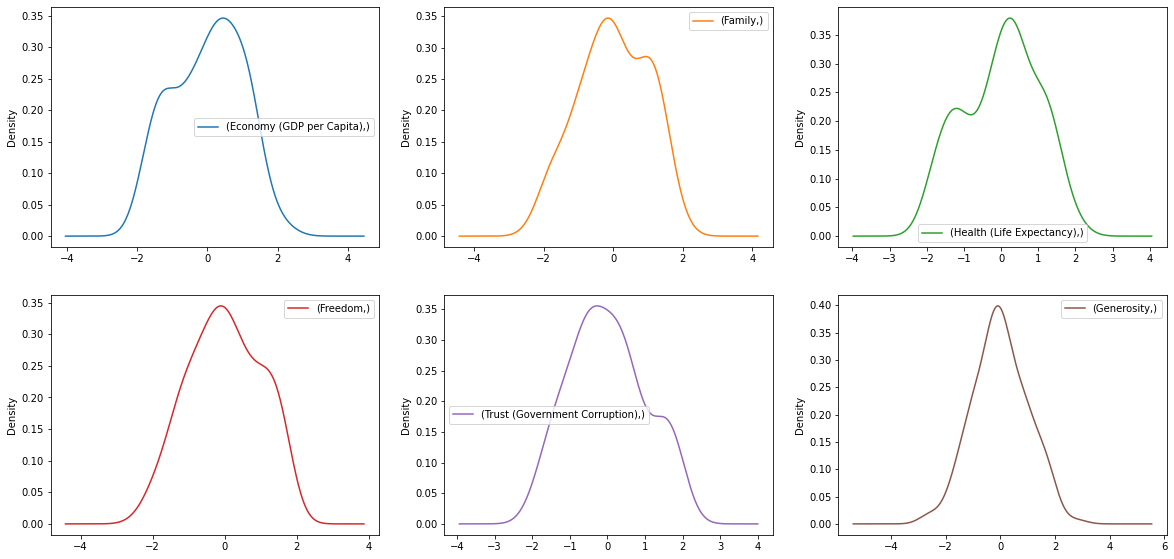

In [88]:
x_trans.plot(kind='density',subplots=True,sharex=False,layout=(3,3),figsize=(20,15))

Economy (GDP per Capita)            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Family                           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Freedom                             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Trust (Government Corruption)    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Generosity                       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

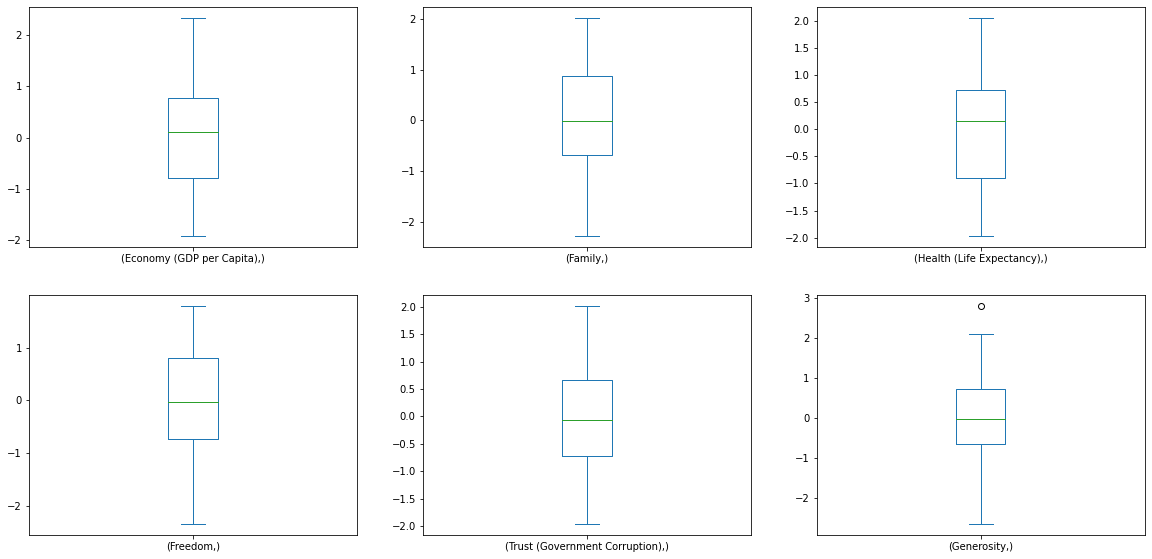

In [89]:
#now we will check for the outliers
x_trans.plot(kind='box',subplots=True,sharex=False,layout=(3,3),figsize=(20,15))
# - - No outliers was found

In [101]:
#checking the outlier using zscore
from scipy.stats import zscore
x_zscore = zscore(x_trans)

x_zscoreabs = np.abs((x_zscore)<3).all()

In [102]:
x_zscoreabs

Economy (GDP per Capita)         True
Family                           True
Health (Life Expectancy)         True
Freedom                          True
Trust (Government Corruption)    True
Generosity                       True
dtype: bool

In [193]:
# selecting the best random state for linear regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
maxrs = 0
min_mae = .5
for i in range(0,2000):
    x_train, x_test, y_train,y_test = train_test_split(x_trans,y,random_state=i,test_size=.20)
    le = LinearRegression()
    le.fit(x_train,y_train)
    y_pred = le.predict(x_test)
    mae= mean_squared_error(y_test,y_pred)
    
    if mae<min_mae:
        min_mae = mae
        maxrs = i
        print('best random state = ',maxrs,'mean squard error =',maxacc, )

best random state =  0 mean squard error = 0.12377417440776342
best random state =  1 mean squard error = 0.12377417440776342
best random state =  52 mean squard error = 0.12377417440776342
best random state =  828 mean squard error = 0.12377417440776342
best random state =  1758 mean squard error = 0.12377417440776342


In [194]:
# we will use Linear regression with random state 1758
x_train, x_test, y_train,y_test = train_test_split(x_trans,y,random_state=1758,test_size=.20)
le = LinearRegression()
le.fit(x_train,y_train)
y_pred = le.predict(x_test)
le.score(x_test,y_test)
# we got score of 93.13 percent#

0.9313374969049566

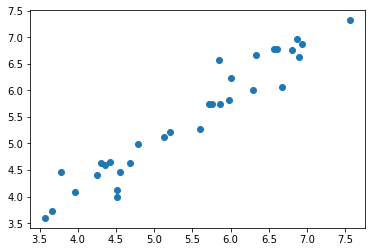

In [195]:
#lets visulaize this

plt.scatter(y_test,y_pred)

#### Model evaulation

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('mean absolute error ----',mean_absolute_error(y_test,y_pred))
print('mean Squared error ----',mean_squared_error(y_test,y_pred))
print('Root mean Squared error ----',np.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute error ---- 0.21989195593986993
mean Squared error ---- 0.08547378502485331
Root mean Squared error ---- 0.2923590002460217


##### Checking if the model is overfitting using LassoCV

In [197]:
  from sklearn.linear_model import Lasso,LassoCV

In [198]:
lasscv = LassoCV( alphas=None, max_iter=500, normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=500, normalize=True)

In [199]:
alpha = lasscv.alpha_
alpha

0.003638340850307096

In [200]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.003638340850307096)

In [201]:
lasso_reg.score(x_test,y_test)

0.9310354175280604